In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('../data/train.csv', index_col="ID")
test = pd.read_csv('../data/test.csv', index_col="ID")

In [31]:
train.head()

,measurement_time,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,sun_radiation_east,sun_radiation_west,sun_radiation_south,sun_radiation_north,sun_radiation_perpendicular,outside_temperature,wind_speed,wind_direction,clouds
ID,,,,,,,,,,,,,,,,
0,2023-11-01 00:00:00,3.400000,27.600000,18.799999,19.750000,21.100000,20.129892,0.0,0.0,0.0,0.0,0.0,8.97,2.06,140.0,20.0
1,2023-11-01 01:00:00,2.933333,28.400000,18.933333,19.833333,21.033333,20.052919,0.0,0.0,0.0,0.0,0.0,9.19,2.06,110.0,100.0
2,2023-11-01 02:00:00,7.166667,29.400000,19.000000,19.799999,21.000000,19.992375,0.0,0.0,0.0,0.0,0.0,9.42,2.57,140.0,20.0
3,2023-11-01 03:00:00,10.500000,30.100000,19.033333,19.933333,24.600000,19.941565,0.0,0.0,0.0,0.0,0.0,9.19,2.57,150.0,100.0
4,2023-11-01 04:00:00,8.733334,31.866666,19.100000,20.000000,24.700000,19.924502,0.0,0.0,0.0,0.0,0.0,9.99,2.57,160.0,100.0


In [6]:
train.describe()

,ID,target,source_1_temperature,source_2_temperature,source_3_temperature,source_4_temperature,mean_room_temperature,sun_radiation_east,sun_radiation_west,sun_radiation_south,sun_radiation_north,sun_radiation_perpendicular,outside_temperature,wind_speed,wind_direction,clouds
count,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7047.000000,7044.000000
mean,3523.000000,13.902992,31.353220,18.285482,18.765825,21.941836,20.591658,131.326270,136.768829,195.958575,47.121580,307.383654,11.023374,4.259801,187.591599,70.425327
std,2034.438006,11.582678,5.961416,1.388247,1.616728,2.111493,1.067446,218.094756,219.425579,272.681407,57.183783,351.661306,6.481420,2.360655,89.276916,33.634026
min,0.000000,0.466667,17.400000,14.750000,15.200000,16.566667,17.706746,0.000000,0.000000,0.000000,0.000000,0.000000,-5.840000,0.000000,0.000000,0.000000
25%,1761.500000,4.800000,28.612500,17.633334,17.925000,20.829597,19.807871,0.000000,0.000000,0.000000,0.000000,0.000000,6.670000,2.570000,120.000000,40.000000
50%,3523.000000,8.575000,33.300000,18.266666,18.650000,21.533333,20.763321,14.354839,9.225806,10.500000,9.806452,43.806452,10.150000,4.120000,210.000000,75.000000
75%,5284.500000,21.633333,35.641667,18.833333,19.833333,22.600000,21.310412,138.258065,149.467742,416.908602,96.500000,680.032258,15.510000,5.660000,250.000000,100.000000
max,7046.000000,60.533333,47.700001,24.650001,25.533333,31.466667,23.621292,796.000000,807.000000,861.000000,226.000000,889.000000,33.420000,17.490000,360.000000,100.000000


In [12]:
# Check for missing values
print(f"Number of missing values in train: {train.isnull().sum().sum()}")
# print only the columns with missing values and the number of missing values per column in train, if no missing values, no output
print(train.isnull().sum()[train.isnull().sum() > 0])
# Percentage of missing values in clouds
print(f"Percentage of missing values in clouds: {train['clouds'].isnull().sum() / len(train['clouds']) * 100}")
print(f"Number of missing values in test: {test.isnull().sum().sum()}")
print(test.isnull().sum()[test.isnull().sum() > 0])


Number of missing values in train: 3
clouds    3
dtype: int64
Percentage of missing values in clouds: 0.04257130693912303
Number of missing values in test: 52
outside_temperature    13
wind_speed             13
wind_direction         13
clouds                 13
dtype: int64


In [14]:
# For every missing value, we will interpolate the result from the previous and next value
train = train.interpolate()
print(f"Number of missing values in train: {train.isnull().sum().sum()}")

Number of missing values in train: 0


/var/folders/jx/nw81mq5d1cl9wrj1h46m_m9h0000gn/T/ipykernel_24373/2621448159.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train = train.interpolate()


sun_radiation_north          outside_temperature            0.594331
sun_radiation_east           sun_radiation_north            0.598342
outside_temperature          mean_room_temperature          0.638545
sun_radiation_west           sun_radiation_perpendicular    0.639077
sun_radiation_perpendicular  sun_radiation_east             0.641843
sun_radiation_west           sun_radiation_north            0.652111
source_2_temperature         source_3_temperature           0.713757
sun_radiation_perpendicular  sun_radiation_north            0.847473
                             sun_radiation_south            0.861518
source_4_temperature         source_4_temperature           1.000000
dtype: float64


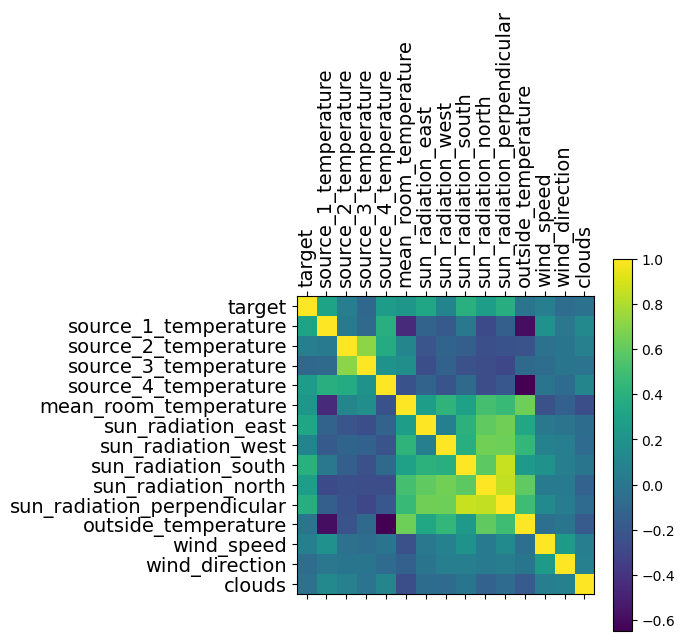

In [15]:
# Matrix of correlation between numerical columns
# only numerical columns are considered not measurement_time
numerical_train = train.drop(['measurement_time'], axis=1)
matrix = numerical_train.corr()
# print highest correlations var 1 var 2 corr
print(matrix.unstack().sort_values().drop_duplicates().tail(10))

plt.matshow(matrix)
# include the column names
plt.xticks(range(numerical_train.shape[1]), numerical_train.columns, fontsize=14, rotation=90)
plt.yticks(range(numerical_train.shape[1]), numerical_train.columns, fontsize=14)
plt.colorbar()
plt.show()

According to  Pearson correlation coefficient, r > 0.75 is considered as highly correlated. This mainly affects our results with radiation values. The following pairs of variables are highly correlated:
sun_radiation_north          sun_radiation_perpendicular    0.847473
sun_radiation_perpendicular  sun_radiation_south            0.861518

Therefore we drop `sun_radiation_perpendicular` column.

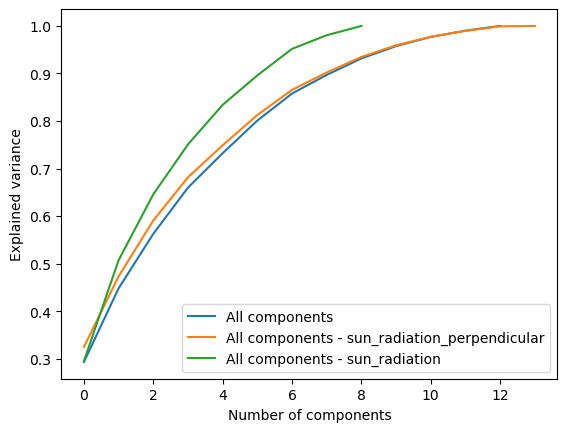

In [23]:
# which percentage of the data is explained by all components - sun_radiation_perpendicular
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# calculate the explained variance ratio for all components and all components - sun_radiation_perpendicular and plot the results in the same graph
scaler = StandardScaler()
X3 = scaler.fit_transform(numerical_train.drop(columns=['sun_radiation_perpendicular', 'target', 'sun_radiation_north', 'sun_radiation_south', 'sun_radiation_east', 'sun_radiation_west']))
X1 = scaler.fit_transform(numerical_train.drop(columns=['sun_radiation_perpendicular', 'target']))
X2 = scaler.fit_transform(numerical_train.drop(columns=['target']))
pca1 = PCA()
pca2 = PCA()
pca3 = PCA()
pca1.fit(X1)
pca2.fit(X2)
pca3.fit(X3)
plt.plot(np.cumsum(pca1.explained_variance_ratio_), label='All components')
plt.plot(np.cumsum(pca2.explained_variance_ratio_), label='All components - sun_radiation_perpendicular')
plt.plot(np.cumsum(pca3.explained_variance_ratio_), label='All components - sun_radiation')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.legend()
plt.show()

In [24]:
# print the variance explained by the max number of components for each case
print(f"Explained variance by all components: {np.cumsum(pca2.explained_variance_ratio_)[-1]}")
print(f"Explained variance by all components - sun_radiation_perpendicular: {np.cumsum(pca1.explained_variance_ratio_)[-1]}")
print(f"Explained variance by all components - sun_radiation: {np.cumsum(pca3.explained_variance_ratio_)[-1]}")

Explained variance by all components: 0.9999999999999999
Explained variance by all components - sun_radiation_perpendicular: 1.0000000000000002
Explained variance by all components - sun_radiation: 0.9999999999999998
